In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import matplotlib.patches as mpatches
from IPython.display import HTML, display
import tabulate
import pandas as pd

In [2]:
def create_classifier(train_file, model_name, epoch, lr, ngrams, loss, dim, ws):
    return fasttext.supervised(train_file,
                               model_name,
                               epoch=epoch,
                               dim=dim,
                               word_ngrams=ngrams,
                               lr=lr,
                               ws=ws,
                               min_count=5,
                               bucket=2000000,
                               loss=loss)

In [3]:
import fasttext
from FastText import FastText
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [6]:
# total_result = {}
# epochs = [1]
# lr = [0.1]
# word_ngrams = [1]
# loss = ['ns', 'hs', 'softmax']
# dim = [100]
# ws = [1]

train_file = './data/training_all.txt'
test_file = './data/testing_all.txt'
model = FastText()
postProcessedTrainPhrases, postProcessedTestPhrases, trainLabels, testLabels = model.preprocessData()
testSentences = model.extractText(postProcessedTestPhrases)

init
Loading and preprocessing data...



In [7]:
count = 1
total_result = {}
epochs = [5]
lr = [0.03, 0.05, 0.08, 0.1]
word_ngrams = [1, 2, 3]
loss = ['ns', 'hs', 'softmax']
dim = [100, 200, 300]
ws = [1, 5, 10]

with open("ft_parameters_temp.json", mode='w', encoding='utf-8') as f:
    for epoch_choice in epochs:
        for lr_choice in lr:
            for ngrams_choice in word_ngrams:
                for loss_choice in loss:
                    for dim_choice in dim:
                        for ws_choice in ws:
                            model_name = "ft_model_temp"
                            classifier = create_classifier(train_file, model_name, epoch_choice, lr_choice,
                                                           ngrams_choice, loss_choice, dim_choice, ws_choice)
                            res = classifier.predict(testSentences)
                            predicted = []
                            for i in res:
                                predicted.append(int(i[0]))
                            # print(predicted)
                            total_result[count] = {}
                            tn, fp, fn, tp = confusion_matrix(testLabels, predicted).ravel()
                            # print(tn, fp, fn, tp)
                            total_result[count]['confusion_matrix'] = []
                            total_result[count]['confusion_matrix'].append(int(tn))
                            total_result[count]['confusion_matrix'].append(int(fp))
                            total_result[count]['confusion_matrix'].append(int(fn))
                            total_result[count]['confusion_matrix'].append(int(tp))
                            # print(total_result[count]['confusion_matrix'])
                            report = precision_recall_fscore_support(testLabels, predicted)
                            total_result[count]['precision'] = report[0][0]
                            total_result[count]['recall'] = report[1][0]
                            total_result[count]['fbeta_score'] = report[2][0]
                            # print(report)
                            # print(report.fbeta_score)
                            total_result[count]['accuracy'] = classifier.test(test_file).precision
                            total_result[count]["ep"] = epoch_choice
                            total_result[count]["lr"] = lr_choice
                            total_result[count]["ngrams"] = ngrams_choice
                            total_result[count]["loss"] = loss_choice
                            total_result[count]["dim"] = dim_choice
                            total_result[count]["ws"] = ws_choice
                            # total_result[count]['model'] = [epoch_choice, lr_choice,ngrams_choice,loss_choice, dim_choice,ws_choice]
                            f = open("ft_parameters_temp.json", 'w')
                            f.write(json.dumps(total_result, indent=4, sort_keys=True))
                            f.close()
                            count += 1

f = open("ft_parameters_all.json", 'w+')
f.write(json.dumps(total_result, indent=4, sort_keys=True))
f.close()

In [8]:
class Individual():
    def __init__(self, epoch=1, lr=0, word_ngrams = 3, loss='ns', dim=300, ws=5,
                 precision=0, recall=0, fbeta=0, accuracy=0, confusion_matrix=None):
        self.epoch = epoch
        self.lr = lr
        self.word_ngrams = word_ngrams
        self.loss = loss
        self.dim = dim
        self.ws = ws
        self.precision = precision
        self.recall = recall
        self.fbeta = fbeta
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix

    def sort_individuals(self, individuals, param):
        k = lambda x: int(x['1'][param])
        individuals = sorted(individuals, key=k, reverse=True)
        return individuals

In [9]:
def plot_eval(inds, filename):
    total_result = {}
    count = 1
    ep = 0
    lr = 0
    ngrams = 0
    loss = {'ns':0, 'hs':0, 'softmax':0}
    dim = 0
    ws = 0
    for i in inds:
        if i.precision > 0.5 and i.recall > 0.3:
            total_result[count] = {}
            total_result[count]['confusion_matrix'] = i.confusion_matrix
            total_result[count]['0precision'] = i.precision
            total_result[count]['recall'] = i.recall
            total_result[count]['fbeta_score'] = i.fbeta
            total_result[count]['accuracy'] = i.accuracy
            total_result[count]["ep"] = i.epoch
            total_result[count]["lr"] = i.lr
            total_result[count]["ngrams"] = i.word_ngrams
            total_result[count]["loss"] = i.loss
            total_result[count]["dim"] = i.dim
            total_result[count]["ws"] = i.ws
            ep += i.epoch
            lr += i.lr
            ngrams += i.word_ngrams
            loss[i.loss] = loss[i.loss]+1
            dim += i.dim
            ws += i.ws
            count += 1

    f = open("parameters_all_sorted_tn.json", 'w+')
    f.write(json.dumps(total_result, indent=4, sort_keys=True))
    f.close()
#     print(ep/count)
#     print(lr/count)
#     print(ngrams/count)
#     print(loss)
#     print(dim/count)
#     print(ws/count)

    color = sns.color_palette("hls", 8)
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    x = []
    for i in range(1, count):
        x.append(i)
    for i in x:
        y1.append(total_result[i]['0precision'])
        y2.append(total_result[i]['recall'])
        y3.append(total_result[i]['fbeta_score'])
        # y4.append(total_result[i]['accuracy'])

    plt.figure(figsize=(20,12))
#     print(x)
#     print(len(x))
#     print(y1)
#     print(len(y1))
    ax = sns.pointplot(x, y1, alpha=0.8, color=color[1])
    ax = sns.pointplot(x, y2, alpha=0.8, color=color[2])
    ax = sns.pointplot(x, y3, alpha=0.8, color=color[3])
    # sns.pointplot(x, y4, alpha=0.8, color=color[4])
    # leg_handles = ax.get_legend_handles_labels()[0]
    # ax.legend(leg_handles, ['precision', 'recall', 'f_score'], title='legend')

    plt.ylabel('Evaluation', fontsize=12)
    plt.xlabel('Parameters Combination Id', fontsize=12)
    title = "FastText Performance Evaluation (" + filename + ")"
    plt.title(title, fontsize=15)
    plt.xticks(rotation='vertical')
    # plt.legend(['precision', 'recall', 'f_score'])
    plt.show()
    return total_result

324
324


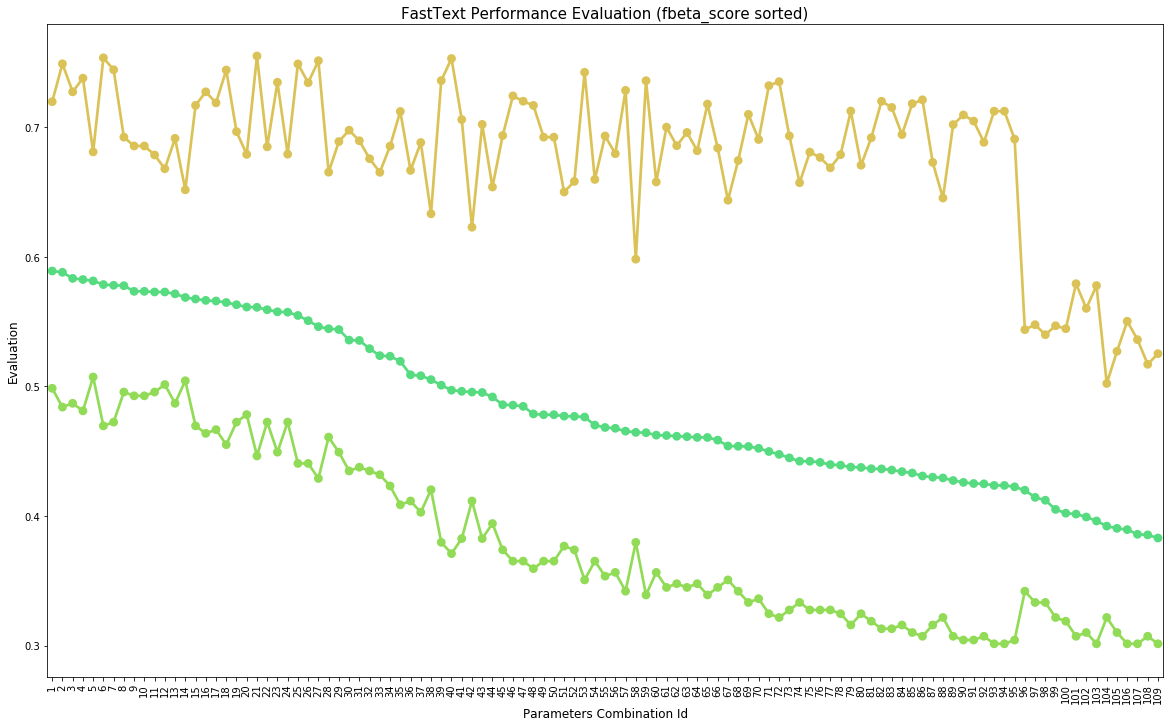

In [10]:
with open("ft_parameters_all.json") as jsondata:
    data = json.load(jsondata)

# data = json.loads(open("ft_parameters_all.json").read())
    inds = []
    for v in data.values():
        ind = Individual(v['ep'], v['lr'], v['ngrams'], v['loss'], v['dim'], v['ws'], v['precision'],
                         v['recall'], v['fbeta_score'], v['accuracy'], v['confusion_matrix'])
        inds.append(ind)
    print(len(inds))
    print(len(data.values()))
    # inds = sorted(inds, key=lambda x: x.confusion_matrix[0], reverse=True)
    pop = sorted(inds, key=lambda x: x.fbeta, reverse=True)
    filename = "fbeta_score sorted"
    total_result = plot_eval(pop, filename)

In [11]:
y= []
with open("ft_parameters_all.json") as jsondata:
    data = json.load(jsondata)
    count = 1
    for d in data:
        y.append((count, data[d]['fbeta_score']))
        count+=1
color = sns.color_palette()

In [12]:
sort = sorted(y, key=lambda x: x[1],reverse=True)

datatable1 = []
datatable1.append(["Learning rate","Word ngrams","Loss","Word vector size","Window size", "Fbeta score", "Precision","Recall","Confusion Matrix", "Accuracy"])
sort_id = []
for i in sort:
    sort_id.append(i[0])
with open("ft_parameters_all.json") as jsondata:
    data = json.load(jsondata)
    for i in sort_id:
        datatable1.append([data[str(i)]['lr'],data[str(i)]['ngrams'],data[str(i)]['loss'],data[str(i)]['dim'],data[str(i)]['ws'],data[str(i)]['fbeta_score'],
                           data[str(i)]['precision'],data[str(i)]['recall'],data[str(i)]['confusion_matrix'], data[str(i)]['accuracy']] )
display(HTML(tabulate.tabulate(datatable1, tablefmt='html')))

Learning rate,Word ngrams,Loss,Word vector size,Window size,Fbeta score,Precision,Recall,Confusion Matrix,Accuracy
0.1,3,ns,100,5,0.589041095890411,0.7196652719665272,0.4985507246376812,"[172, 173, 67, 1834]",0.8944790739091718
0.1,3,ns,100,10,0.5880281690140845,0.7488789237668162,0.48405797101449277,"[167, 178, 56, 1845]",0.8975957257346393
0.1,3,ns,200,5,0.5833333333333333,0.7272727272727273,0.48695652173913045,"[168, 177, 63, 1838]",0.8949243098842387
0.1,3,ns,300,5,0.5824561403508771,0.7377777777777778,0.4811594202898551,"[166, 179, 59, 1842]",0.8949243098842387
0.1,2,ns,200,1,0.5813953488372093,0.6809338521400778,0.5072463768115942,"[175, 170, 82, 1819]",0.8882457702582368
0.1,3,ns,300,1,0.5785714285714286,0.7534883720930232,0.46956521739130436,"[162, 183, 53, 1848]",0.8967052537845058
0.1,3,ns,100,1,0.5780141843971631,0.7442922374429224,0.47246376811594204,"[163, 182, 56, 1845]",0.8958147818343722
0.1,3,ns,300,10,0.5777027027027027,0.6923076923076923,0.4956521739130435,"[171, 174, 76, 1825]",0.890026714158504
0.08,3,ns,100,1,0.5733558178752108,0.6854838709677419,0.4927536231884058,"[170, 175, 78, 1823]",0.8886910062333037
0.1,2,ns,200,5,0.5733558178752108,0.6854838709677419,0.4927536231884058,"[170, 175, 78, 1823]",0.8882457702582368


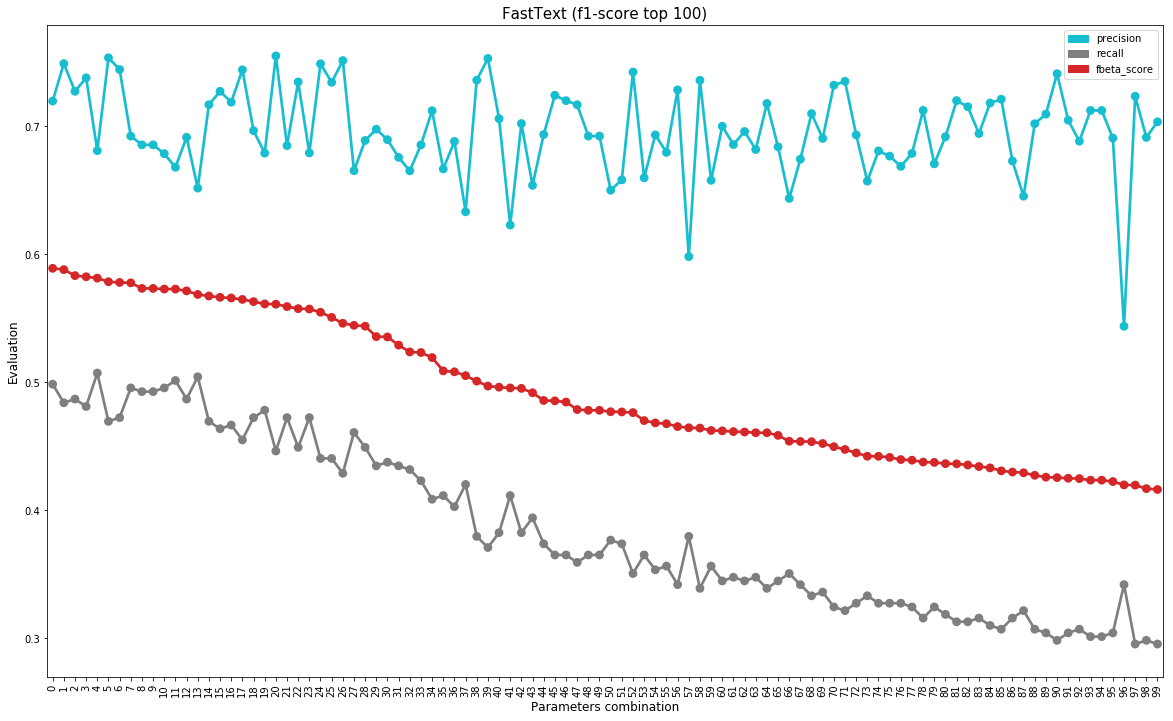

In [14]:
top100 = sorted(y, key=lambda x: x[1],reverse=True)[0:100]
dataplot1= {'precision':[],'recall':[],'f1-score':[]}
top100_id = []
for i in top100:
    top100_id.append(i[0])
with open("ft_parameters_all.json") as jsondata:
    data = json.load(jsondata)
    for i in top100_id:
#         print(data[str(i)])
        dataplot1['precision'].append(data[str(i)]['precision'])
        dataplot1['recall'].append(data[str(i)]['recall'])
        dataplot1['f1-score'].append(data[str(i)]['fbeta_score'])
        
# display(HTML(tabulate.tabulate(datatable1, tablefmt='html')))
x = list(range(100))
# print(x)
# df = pd.DataFrame(data=dataplot1)
# print(len(dataplot1['precision']))
plt.figure(figsize=(20,12))
sns.pointplot(x, dataplot1['precision'], alpha=0.1, color=color[9])
sns.pointplot(x, dataplot1['recall'], alpha=0.2, color=color[7])
sns.pointplot(x, dataplot1['f1-score'], alpha=0.3, color=color[3])
# sns.pointplot(x, y4, alpha=0.4, color=color[6])

color_patch1 = mpatches.Patch(color=color[9], label="precision")
color_patch2 = mpatches.Patch(color=color[7], label="recall")
color_patch3 = mpatches.Patch(color=color[3], label="fbeta_score")
plt.legend(handles=[color_patch1,color_patch2,color_patch3])
plt.ylabel('Evaluation', fontsize=12)
plt.xlabel('Parameters combination', fontsize=12)
plt.title("FastText (f1-score top 100)", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

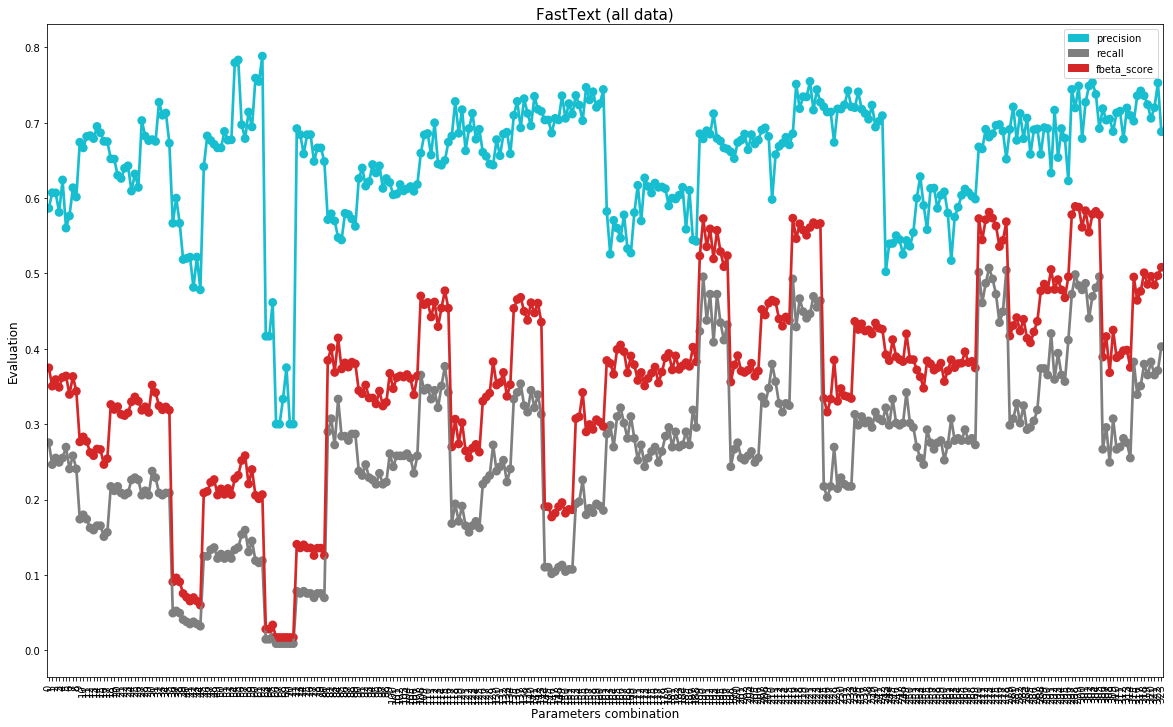

In [15]:
y1 = []
y2 = []
y3 = []
y4 = []
with open("ft_parameters_all.json") as jsondata:
    data = json.load(jsondata)
    for d in data:
        if data[d]['fbeta_score']>0:
            y1.append(data[d]['precision'])
            y2.append(data[d]['recall'])
            y3.append(data[d]['fbeta_score'])
            y4.append(data[d]['accuracy'])
        
color = sns.color_palette()
x = list(range(len(y1)))
# print(x)
plt.figure(figsize=(20,12))
sns.pointplot(x, y1, alpha=0.1, color=color[9])
sns.pointplot(x, y2, alpha=0.2, color=color[7])
sns.pointplot(x, y3, alpha=0.3, color=color[3])
# sns.pointplot(x, y4, alpha=0.4, color=color[6])

color_patch1 = mpatches.Patch(color=color[9], label="precision")
color_patch2 = mpatches.Patch(color=color[7], label="recall")
color_patch3 = mpatches.Patch(color=color[3], label="fbeta_score")
plt.legend(handles=[color_patch1,color_patch2,color_patch3])
plt.ylabel('Evaluation', fontsize=12)
plt.xlabel('Parameters combination', fontsize=12)
plt.title("FastText (all data)", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
file = '../Models/LSTM/labeled_document_seconditer.json'
isDS = False
model.classify(file,isDS)